Code up momentum accelerated gradient descent:
Code up the momentum accelerated gradient descent scheme described in Section 3.8.2 and use it to repeat the experiments detailed in Example 3.20 using a cost function history plot to come to the same conclusions drawn by studying the contour plots shown in Figure 3.21.

In [120]:
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
# import statement for autograd wrapped numpy
import autograd.numpy as np   
import matplotlib.pyplot as plt
# import statment for gradient calculator
from autograd import grad
import sys

from autograd import value_and_grad 
def momentum_gd(g,alpha_choice,beta,max_its,w):
    gradient = value_and_grad(g)

    weight_history = []
    cost_history = []
    alpha = 0
    cost_eval,grad_eval = gradient(w)
    
    d = np.zeros((w.shape))
    for k in range(1,max_its+1):
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)
        
        ##update exponential average of gradient directions
        #when beta = 0 d = -grad_descent aka it's just gradient descent
        d = beta*d - (1 - beta)*grad_eval

        # take step
        w = w + alpha*d
            
    weight_history.append(w)
    cost_history.append(g(w))  
    return weight_history,cost_history

init_point = np.array([10.0,1.0])
num_its = 25 
alpha_choice = 10**(-1);
a1 = 0
b1 = 0*np.ones((init_point.shape[0],1))
# C1 = np.array([[0.5,0],[0,12]])
C1 = np.array([[0.5,0],[0,9.75]]) #this looks more normal but im pretty sure its supposed to be a 12?

# a quadratic function defined using the constants above
# g = lambda w: (a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w))[0]
g = lambda w: a1 + np.dot(b1.T,w) + np.dot(np.dot(w.T,C1),w) #i believe these are the same?

# max_its = 25; alpha_choice = 10**(-1);
B = 0 #this is equivalent to normal gradient descent 
wh_1,ch_1 = momentum_gd(g,alpha_choice,B,num_its,init_point)

B = 0.2;
wh_2,ch_2 = momentum_gd(g,alpha_choice,B,num_its,init_point)

B = 0.7
wh_3,ch_3 = momentum_gd(g,alpha_choice,B,num_its,init_point)

<IPython.core.display.Javascript object>


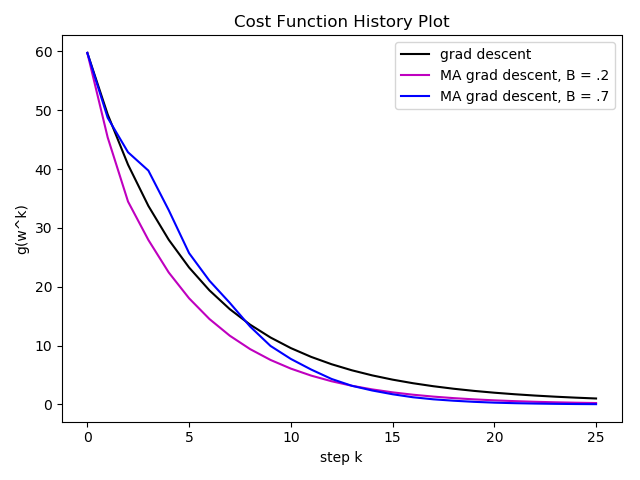

In [121]:
# init_point = np.array([[3.0,3.0]])
plt.plot(ch_1, 'k-', label = 'grad descent')
plt.plot(ch_2, 'm-', label = 'MA grad descent, B = .2')
plt.plot(ch_3, 'b-', label = 'MA grad descent, B = .7')
plt.title("Cost Function History Plot")
plt.legend(loc="upper right")
plt.xlabel("step k")
plt.ylabel("g(w^k)")
plt.show()